In [15]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

def currency_rate(cur1, cur2, api = 'OZHBQ2Q48QC0NFRZ'):
    rate = requests.get(f'https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency={cur1}&to_currency={cur2}&apikey={api}').json()
    rate = rate['Realtime Currency Exchange Rate']
    return pd.DataFrame([rate.values()], columns=rate.keys())


def continuous_rate(cur1, cur2, seconds = 15):
    data = currency_rate(cur1, cur2)
    while True:
        time.sleep(seconds)
        data_next = currency_rate(cur1, cur2)
        data = data.append(data_next)
        data.to_csv('../data/time_series_data.csv')
        
# if __name__ = '__main__':        
#     continuous_rate('USD','EUR')

<IPython.core.display.Javascript object>


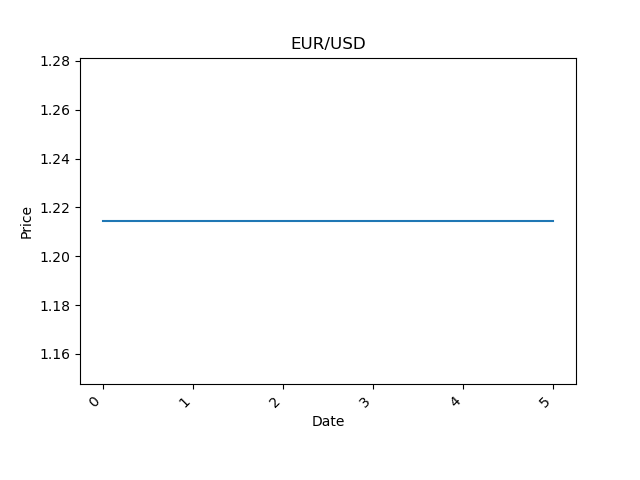

In [39]:
fig = plt.figure()
#creating a subplot 
ax = fig.add_subplot(1,1,1)

def animate(i):
    data = pd.read_csv('../data/time_series_data.csv')
    xs = []
    ys = []
    values = data['5. Exchange Rate'].values
    for x,y in zip(range(len(values)), values):
        xs.append(x)
        ys.append(y)
    ax.clear()
    ax.plot(xs,ys)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('EUR/USD')
    fig.autofmt_xdate(rotation=45)

    
ani = FuncAnimation(fig, animate, interval=15000) 
plt.show()